# LDA, QDA, and logistic regression

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, neighbors, metrics
from matplotlib import patches, cm
from matplotlib.colors import LinearSegmentedColormap
from tqdm import tqdm, tnrange, tqdm_notebook

In [10]:
my_colors = [(1, 0, 0),(0, 0, 1)]
my_cm = LinearSegmentedColormap.from_list('my_cm', my_colors, N=2)

**Construction of dataset**

In [11]:
np.random.seed(1234)
N = 50 # number of data points
blue_data = np.random.multivariate_normal([2.5,0],[[2,1],[1,2]],N)
blue_labels = 1 * np.ones((N,1)) # coding blue label as one
red_data = np.random.multivariate_normal([0,2.5],[[2,1],[1,2]],N)
red_labels = 0 * np.ones((N,1)) # coding red label as zero
data = np.concatenate((blue_data,red_data),axis=0)
labels = np.concatenate((blue_labels,red_labels),axis=0)

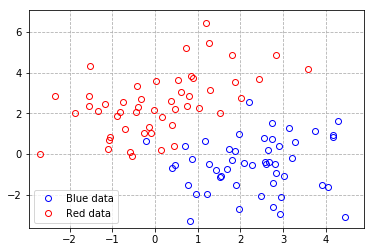

In [12]:
plt.plot(blue_data[:,0],blue_data[:,1],'o',markerfacecolor="None",markeredgecolor='b',label='Blue data')
plt.plot(red_data[:,0],red_data[:,1],'o',markerfacecolor="None",markeredgecolor='r',label='Red data')
plt.xlim([1.1*np.min(data[:,0]),1.1*np.max(data[:,0])])
plt.ylim([1.1*np.min(data[:,1]),1.1*np.max(data[:,1])])
plt.grid(b=True,linestyle="--")
leg = plt.legend(loc = "lower left")

## K-NN classifier

In [13]:
k_neighbors = 2
knn = neighbors.KNeighborsClassifier(n_neighbors=k_neighbors,algorithm="brute")
knn.fit(data,labels.ravel()) # ravel flattens the array to remove unncessary dimensions

# Need to create a mesh to evaluate classifier
x_grid = np.linspace(1.5*np.min(data[:,0]),1.5*np.max(data[:,0]),100)
y_grid = np.linspace(1.5*np.min(data[:,1]),1.5*np.max(data[:,1]),100)
x_mesh, y_mesh = np.meshgrid(x_grid,y_grid)
knn_pred = knn.predict(np.c_[x_mesh.ravel(),y_mesh.ravel()]) # cute trick
print (np.shape(knn_pred))
knn_pred = knn_pred.reshape(x_mesh.shape)

(10000,)


/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


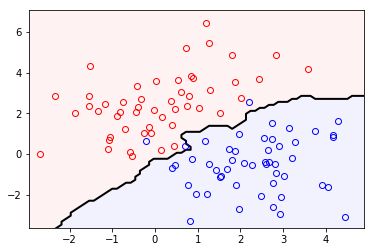

In [14]:
plt.plot(blue_data[:,0],blue_data[:,1],'o',markerfacecolor="None",markeredgecolor='b',label='Blue data')
plt.plot(red_data[:,0],red_data[:,1],'o',markerfacecolor="None",markeredgecolor='r',label='Red data')
plt.xlim([1.1*np.min(data[:,0]),1.1*np.max(data[:,0])])
plt.ylim([1.1*np.min(data[:,1]),1.1*np.max(data[:,1])])
KNN_plot = plt.contourf(x_mesh,y_mesh,knn_pred,levels = [-1,0,1],cmap=my_cm,alpha=0.05)
KNN_plot = plt.contour(x_mesh,y_mesh,knn_pred,[-1,0,1],linewidths=2,colors='k')
plt.savefig('/home/harshbhate/Desktop/4_a.png', bbox_inches='tight')

# Optimal Bayes Classifier

In [15]:
#importing function to generate pdf
from scipy.stats import multivariate_normal
rv_xGivenBlue = multivariate_normal([2.5,0], 
                                    [[2,1],[1,2]])
rv_xGivenRed = multivariate_normal([0,2.5], 
                                   [[2,1],[1,2]])
Bayes_pred = []
for pos in np.c_[x_mesh.ravel(),y_mesh.ravel()]:
    p_xGivenBlue = rv_xGivenBlue.pdf(pos);
    p_xGivenRed = rv_xGivenRed.pdf(pos);
    if (p_xGivenBlue > p_xGivenRed):
        Bayes_pred.append(1)
    else:
        Bayes_pred.append(0)
Bayes_pred = np.array(Bayes_pred)
Bayes_pred = Bayes_pred.reshape(x_mesh.shape)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


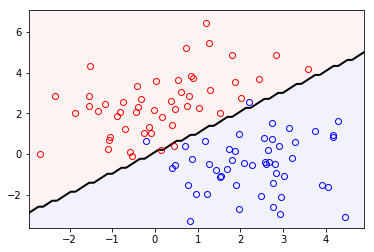

In [16]:
plt.plot(blue_data[:,0],blue_data[:,1],'o',markerfacecolor="None",markeredgecolor='b',label='Blue data')
plt.plot(red_data[:,0],red_data[:,1],'o',markerfacecolor="None",markeredgecolor='r',label='Red data')
plt.xlim([1.1*np.min(data[:,0]),1.1*np.max(data[:,0])])
plt.ylim([1.1*np.min(data[:,1]),1.1*np.max(data[:,1])])
KNN_plot = plt.contourf(x_mesh,y_mesh,Bayes_pred,levels = [-1,0,1],cmap=my_cm,alpha=0.05)
KNN_plot = plt.contour(x_mesh,y_mesh,Bayes_pred,[-1,0,1],linewidths=2,colors='k')
plt.savefig('/home/harshbhate/Desktop/4_b.png', bbox_inches='tight')

# LDA

In [17]:
# importing LDA module
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit (data, labels.ravel())
lda_pred = lda.predict(np.c_[x_mesh.ravel(),y_mesh.ravel()])
lda_pred = lda_pred.reshape(x_mesh.shape)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


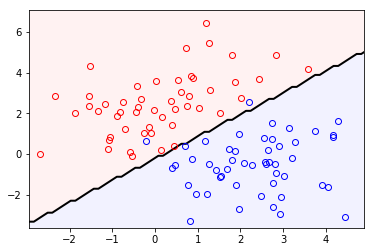

In [18]:
plt.plot(blue_data[:,0],blue_data[:,1],'o',markerfacecolor="None",markeredgecolor='b',label='Blue data')
plt.plot(red_data[:,0],red_data[:,1],'o',markerfacecolor="None",markeredgecolor='r',label='Red data')
plt.xlim([1.1*np.min(data[:,0]),1.1*np.max(data[:,0])])
plt.ylim([1.1*np.min(data[:,1]),1.1*np.max(data[:,1])])
lda_plot = plt.contourf(x_mesh,y_mesh,lda_pred,levels = [-1,0,1],cmap=my_cm,alpha=0.05)
lda_plot = plt.contour(x_mesh,y_mesh,lda_pred,[-1,0,1],linewidths=2,colors='k')
plt.savefig('/home/harshbhate/Desktop/4_c.png', bbox_inches='tight')

# QDA

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit (data, labels.ravel())
qda_pred = qda.predict(np.c_[x_mesh.ravel(),y_mesh.ravel()])
qda_pred = qda_pred.reshape(x_mesh.shape)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


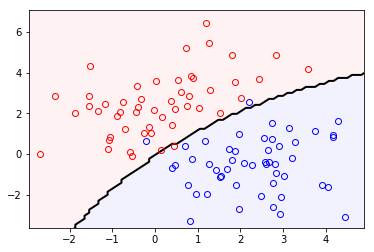

In [20]:
plt.plot(blue_data[:,0],blue_data[:,1],'o',markerfacecolor="None",markeredgecolor='b',label='Blue data')
plt.plot(red_data[:,0],red_data[:,1],'o',markerfacecolor="None",markeredgecolor='r',label='Red data')
plt.xlim([1.1*np.min(data[:,0]),1.1*np.max(data[:,0])])
plt.ylim([1.1*np.min(data[:,1]),1.1*np.max(data[:,1])])
lda_plot = plt.contourf(x_mesh,y_mesh,qda_pred,levels = [-1,0,1],cmap=my_cm,alpha=0.05)
lda_plot = plt.contour(x_mesh,y_mesh,qda_pred,[-1,0,1],linewidths=2,colors='k')
plt.savefig('/home/harshbhate/Desktop/4_d.png', bbox_inches='tight')

# Logistic Classifier

In [21]:
log = linear_model.LogisticRegression (random_state=0, 
                                       solver='lbfgs', 
                                       multi_class='multinomial')
log.fit (data, labels.ravel())
log_pred = log.predict(np.c_[x_mesh.ravel(),y_mesh.ravel()])
log_pred = log_pred.reshape(x_mesh.shape)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


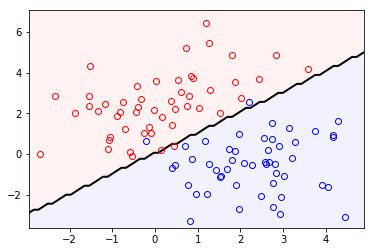

In [22]:
plt.plot(blue_data[:,0],blue_data[:,1],'o',markerfacecolor="None",markeredgecolor='b',label='Blue data')
plt.plot(red_data[:,0],red_data[:,1],'o',markerfacecolor="None",markeredgecolor='r',label='Red data')
plt.xlim([1.1*np.min(data[:,0]),1.1*np.max(data[:,0])])
plt.ylim([1.1*np.min(data[:,1]),1.1*np.max(data[:,1])])
lda_plot = plt.contourf(x_mesh,y_mesh,log_pred,levels = [-1,0,1],cmap=my_cm,alpha=0.05)
lda_plot = plt.contour(x_mesh,y_mesh,log_pred,[-1,0,1],linewidths=2,colors='k')
plt.savefig('/home/harshbhate/Desktop/4_e.png', bbox_inches='tight')